In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.common.action_chains import ActionChains
import time
import requests

In [2]:
# Configura las opciones de Chrome para usar Brave
brave_path = 'C:/Program Files/BraveSoftware/Brave-Browser/Application/brave.exe'  # Ajusta esta ruta según tu instalación de Brave
options = Options()
options.binary_location = brave_path

try:
    # Inicia el navegador Brave usando webdriver-manager
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # Busca la pagina web que le especifiquemos por medio de su url
    driver.get('https://www.planetagrandt.com.ar/search/label/Estad%C3%ADsticas')

    # Esperar a que cargue la pagina
    wait = WebDriverWait(driver, 8)

    #Guardar el link a las estadisticas en una variable
    estadisticas_url = driver.find_element(By.LINK_TEXT, 'Ver Estadísticas')

    #Iniciar un movimiento de scroll para llegar hasta la ubicación del link a las estadisticas
    #Primero hay que crear una instancia Actions Chains

    actions = ActionChains(driver)

    actions.move_to_element(estadisticas_url)
    actions.perform()
    time.sleep(2)
    actions.click(estadisticas_url)
    actions.perform()

    #Obtener el numero de pesatañas abiertas
    pestañas = driver.window_handles

    #Cambiar a la utlima pestaña abrierta
    driver.switch_to.window(pestañas[-1])
                            

    #Url actual del google sheets de estadisticas:
    urlstats = driver.current_url 

    #Se modifica el final de la URL para descargar como CSV
    csv_url = urlstats.replace('/pubhtml', '/pub?output=csv')

    #Especifico la ruta local
    rutalocal = 'C:/Users/Juan Pablo/Desktop/PowerGranDt/Scraping/estadisticasprueba.csv'

    response = requests.get(csv_url)
    if response.status_code == 200:

        content = response.content.decode("utf-8")

        with open(rutalocal, "w") as archivo:
            archivo.write(content)
    else:
        print("No fue posible descargar el archivo")

finally:
    driver.quit()



+++++++LIMPIEZA DEL DATA SET+++++++++

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
rutalocal = 'C:/Users/Juan Pablo/Desktop/PowerGranDt/Scraping/'

In [5]:
# Lectura del archivo
df = pd.read_csv(rutalocal+'estadisticasprueba.csv', sep=',',header=9, skipfooter= 3,skip_blank_lines=True, encoding='cp1252')

# Esto es mejorable. Si me cambian la info del header y agregan una fila se caga el codigo y pierdo algun dato seguro

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_3012\989168901.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(rutalocal+'estadisticasprueba.csv', sep=',',header=9, skipfooter= 3,skip_blank_lines=True, encoding='cp1252')


In [6]:
pd.options.display.max_columns = None


In [7]:
#Para eliminar las filas completas de NA y las que contienen el nombre del equipo, se usa un threshold de 4 campos que tienen que contener algun valor
df = df.dropna(thresh=4)

In [8]:
#Para eliminar las filas en las que se repiten el header se usara un filtrado por el contenido del primer campo Jugador == Jugador
df = df[df['Jugador']!='Jugador']

In [9]:
df

,Jugador,POS,Equipo,Cotización,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,CG,AcG,PrG,CT,AcT,PrT,GT,GJ,GC,TL,GP,GV,GO,GR,GE,VF,VI,TA,TR,PE,PA
0,"Carranza, Jorge",ARQ,Aldosivi,$ 2.000.000,9,2,9,0,9,5,2,3,3,3,10,9,5,5,10,NaN,NaN,NaN,12,64,"5,33",15,84,"5,60",0,0,0,0,0,0,0,16,0,0,6,1,0,0,0
1,"González Carrizo, Nahuel",ARQ,Aldosivi,$ 300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Moyano, Sebastián",ARQ,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Breitenbruch, Néstor",DEF,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Cabral, Jonathan",DEF,Aldosivi,$ 2.300.000,7,s/c,NaN,NaN,8,5,2,2,4,3,5,8,3,NaN,7,NaN,NaN,NaN,10,47,"4,70",11,54,"4,91",0,0,0,0,0,0,0,NaN,0,0,6,5,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,"Pizzini, Francisco",DEL,Vélez,$ 4.000.000,5,4,NaN,NaN,5,NaN,s/c,5,5,4,4,6,12,NaN,5,NaN,NaN,NaN,8,46,"5,75",10,55,"5,50",1,1,0,0,0,1,0,NaN,0,0,NaN,1,0,0,NaN
1157,"Romero, Braian",DEL,Vélez,$ 5.500.000,6,3,4,2,14,5,11,NaN,NaN,20,4,3,NaN,4,NaN,NaN,NaN,NaN,8,63,"7,88",11,76,"6,91",4,3,0,0,1,0,1,NaN,0,1,NaN,4,0,0,NaN
1158,"Santos, Michael",DEL,Vélez,$ 4.000.000,NaN,NaN,NaN,NaN,NaN,s/c,s/c,5,NaN,NaN,s/c,NaN,NaN,NaN,s/c,NaN,NaN,NaN,1,5,"5,00",1,5,"5,00",0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,NaN
1159,"Verón, Alex",DEL,Vélez,$ 300.000,NaN,NaN,NaN,s/c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,NaN


In [10]:
dfmelt = pd.melt(df,id_vars=['Jugador','POS','Equipo','Cotización','CG','AcG','PrG','CT','AcT','PrT','GT','GJ','GC','TL','GP','GV','GO','GR','GE','VF','VI','TA','TR','PE','PA'],
             var_name='Fecha',
             value_name='Puntaje')


In [11]:
dfmelt.head()

,Jugador,POS,Equipo,Cotización,CG,AcG,PrG,CT,AcT,PrT,GT,GJ,GC,TL,GP,GV,GO,GR,GE,VF,VI,TA,TR,PE,PA,Fecha,Puntaje
0,"Carranza, Jorge",ARQ,Aldosivi,$ 2.000.000,12,64,"5,33",15,84,"5,60",0,0,0,0,0,0,0,16,0,0,6,1,0,0,0,F1,9
1,"González Carrizo, Nahuel",ARQ,Aldosivi,$ 300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F1,NaN
2,"Moyano, Sebastián",ARQ,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F1,NaN
3,"Breitenbruch, Néstor",DEF,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F1,NaN
4,"Cabral, Jonathan",DEF,Aldosivi,$ 2.300.000,10,47,"4,70",11,54,"4,91",0,0,0,0,0,0,0,NaN,0,0,6,5,1,0,NaN,F1,7


In [12]:
dfmelt[dfmelt['Fecha']=='F2']

,Jugador,POS,Equipo,Cotización,CG,AcG,PrG,CT,AcT,PrT,GT,GJ,GC,TL,GP,GV,GO,GR,GE,VF,VI,TA,TR,PE,PA,Fecha,Puntaje
1045,"Carranza, Jorge",ARQ,Aldosivi,$ 2.000.000,12,64,"5,33",15,84,"5,60",0,0,0,0,0,0,0,16,0,0,6,1,0,0,0,F2,2
1046,"González Carrizo, Nahuel",ARQ,Aldosivi,$ 300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F2,NaN
1047,"Moyano, Sebastián",ARQ,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F2,NaN
1048,"Breitenbruch, Néstor",DEF,Aldosivi,$ 1.500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F2,NaN
1049,"Cabral, Jonathan",DEF,Aldosivi,$ 2.300.000,10,47,"4,70",11,54,"4,91",0,0,0,0,0,0,0,NaN,0,0,6,5,1,0,NaN,F2,s/c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,"Pizzini, Francisco",DEL,Vélez,$ 4.000.000,8,46,"5,75",10,55,"5,50",1,1,0,0,0,1,0,NaN,0,0,NaN,1,0,0,NaN,F2,4
2086,"Romero, Braian",DEL,Vélez,$ 5.500.000,8,63,"7,88",11,76,"6,91",4,3,0,0,1,0,1,NaN,0,1,NaN,4,0,0,NaN,F2,3
2087,"Santos, Michael",DEL,Vélez,$ 4.000.000,1,5,"5,00",1,5,"5,00",0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,NaN,F2,NaN
2088,"Verón, Alex",DEL,Vélez,$ 300.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,NaN,F2,NaN


In [13]:
# Eliminamos la F en el campo fecha para utilizarlo con formato numerico poseteriormente
dfmelt['Fecha'] = dfmelt['Fecha'].str.replace('F','')

In [14]:
dfmelt['Fecha'] = dfmelt['Fecha'].astype(int)

In [15]:
#Revisamos los puntajes para controlar que haya valores de un solo tipo
pd.options.display.max_rows = None
dfmelt['Puntaje'].value_counts()


#Los valores que son mayores a 100 no son de un jugador en particular, sino que pertenecen a las estadísticas totales del equipo por fecha

Puntaje
5      1874
6       985
s/c     984
4       928
3       477
7       455
8       321
2       206
9       148
10       79
11       77
12       56
13       53
0        43
15       40
14       40
1        39
18       26
17       25
19       24
16       22
88       16
80       15
66       15
63       14
20       13
78       13
-1       12
89       11
65       11
68       10
81       10
54       10
61       10
82       10
90        9
67        9
60        9
22        9
73        9
75        9
87        9
76        9
59        8
71        8
57        8
70        8
86        8
74        8
77        8
24        8
58        7
72        7
95        7
64        7
85        7
-2        7
79        7
102       6
56        6
83        6
100       6
91        6
96        6
69        6
84        5
53        5
104       5
97        5
106       5
62        5
49        4
50        4
105       4
98        4
45        4
93        4
51        3
48        3
21        3
94        3
92        3
111     

In [16]:
#Cambiamos los puntajes S/c (sin contar) por valores NaN
dfmelt['Puntaje']= dfmelt['Puntaje'].replace('s/c',np.NaN)

In [ ]:
dfmelt.to_csv('C:/Users/Juan Pablo/Desktop/PowerGranDt/Scraping/output/powergdtmelt.csv',encoding='cp1252')

OSError: Cannot save file into a non-existent directory: 'C:\Users\Juan Pablo\Desktop\PowerGranDt\Scraping\output'

In [23]:
data = pd.read_csv('C:/Users/Juan Pablo/Desktop/PowerGranDt/Scraping/output/powergdtmelt.csv',encoding='cp1252')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Juan Pablo/Desktop/PowerGranDt/Scraping/output/powergdtmelt.csv'

In [19]:
data['PrG'].describe()

count     14004
unique      202
top        5,00
freq       1746
Name: PrG, dtype: object

In [20]:
data['PrG'] = data['PrG'].replace(',', '.', regex=True).astype(float)

In [21]:
data['PrG'].head()

0    5.33
1     NaN
2     NaN
3     NaN
4    4.70
Name: PrG, dtype: float64

<Axes: xlabel='PrG', ylabel='POS'>

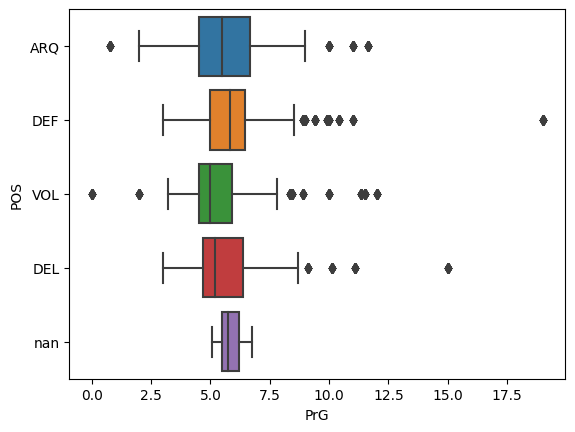

In [22]:
sns.boxplot(y = data['POS'].astype(str), x = data['PrG'].astype(float))